# Homework Assignment #4 (Individual)
## Regression models

### <p style="text-align: right;"> &#9989; Sit Soe.</p>
### <p style="text-align: right;"> &#9989; soesit.</p>

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Performing multiple regression using `statsmodels` and/or `sklearn`
* Understand the metric of a good fit
* Test/Train datasets

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, November 11.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.


------
<a id="toc"></a>

## Table of contents

1. [Part 1: Git](#part1) (7 points)

2. [Part 2: Multiple Regression](#part3) (42 points)

3. [Part 3: Logistic Regression](#part4) (25 points)

4. [Part 4: Finishing](#conclusion) (3 points)

In [118]:
grades = [7, 42, 25, 3]

print(f"The total grade for this assignment is {sum(grades)}" )

The total grade for this assignment is 77


---
<a id="part1"></a>
[Back to ToC](#toc)

## Part 1: Git (7 points)

For this assignment, you're going to add it to the `cmse202-f22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f22-turnin` **local** repository and create a new directory called `hw-04` and copy this notebook in that new directory.

``` bash
# Put the command(s) for creating the new directory

```
mkdir 'hw-04'


&#9989; **Question 1.2 (2 points)**: Before you move on, create a new branch called `hw04_branch` and move into it. In the cell below put the command(s) to create a new branch and to checkout the new branch. (_Note_: your TA will be able to see if you have created the branch and its history).

``` bash
# Put the command(s) for creating and checking your new branch here!

```
git branch 'hw04_branch' 

git checkout

&#9989; **Question 1.3 (3 points):**
Add your name and GitHub username to the top of the notebook, then add and commit **ONLY** the notebook.

``` bash
# Put the command(s) to add and commit here 
```
git add

git commit -m 

What is the commit message you used ?

``` bash
# Answer the question here
```
'only notebook'

&#9989; **Question 1.4 (1 point):** Finally push the updated notebook to GitHub.

``` bash
# Put the command you used to push to GitHub here.
```
git push

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f22-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04-branch`.

In [119]:
# Run this cell before moving on
%pylab
%matplotlib inline
import pandas as pd
import seaborn as sns

sns.set_context("talk")

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [120]:
!pip install statsmodels --upgrade

Defaulting to user installation because normal site-packages is not writeable


---
<a id="part2"></a>
[Back to ToC](#toc)

## Part 2: Mulitple Regression (42 points)

In this part of the homework, you will work with data from the California Housing Prices dataset. Our goal is to use ordinary least squares to design a linear model to fit the median house value in a California census district given eight features. We will try both a linear model using all the provided features, as well as a reduced linear model which only uses a subset of the features. 

&#9989;  **Question 2.1 (1 points)**: **Do This:** Download the file `housing.csv` from the link below, and save it into the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that would have downloaded the file.

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv`

``` bash
# Put the command(s) for downloading the file here!

```

In [121]:
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1454k  100 1454k    0     0  11.7M      0 --:--:-- --:--:-- --:--:-- 11.7M


&#9989;  **Question 2.2 (2 points)**: **Do This:** To get started, read in the `housing.csv` dataset into a Pandas DataFrame, and then display some of its rows.

In [122]:
# Put your code here
housing_df = pd.read_csv('housing.csv')
housing_df

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,5.045455,1.133333,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,6.114035,1.315789,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,5.205543,1.120092,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,5.329513,1.171920,741,349,1.8672,84700,INLAND


&#9989;  **Question 2.3 (2 points)**: You should notice that the DataFrame has a non-numerical feature called "ocean_proximity". There are also a few rows with `NaN` values, although you may not see them in the few rows that were displayed. **Do This:** **Drop the "ocean_proximity" column from the dataframe, and drop all the rows with `NaN` values.** Note that we will not use the "ocean_proximity" column or any of the rows with `NaN` values in this assignment.

In [123]:
# Dropping ocean_proximity column
housing_1 = housing_df.drop(columns=['ocean_proximity'])

# Dropping NaN values
housing_1 = housing_1.dropna()
housing_1

,longitude,latitude,housing_median_age,avg_rooms,avg_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,6.984127,1.023810,322,126,8.3252,452600
1,-122.22,37.86,21,6.238137,0.971880,2401,1138,8.3014,358500
2,-122.24,37.85,52,8.288136,1.073446,496,177,7.2574,352100
3,-122.25,37.85,52,5.817352,1.073059,558,219,5.6431,341300
4,-122.25,37.85,52,6.281853,1.081081,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,5.045455,1.133333,845,330,1.5603,78100
20636,-121.21,39.49,18,6.114035,1.315789,356,114,2.5568,77100
20637,-121.22,39.43,17,5.205543,1.120092,1007,433,1.7000,92300
20638,-121.32,39.43,18,5.329513,1.171920,741,349,1.8672,84700


&#9989;  **Question 2.4 (6 points)**: **Do This:** Using the `OLS()` method in `statsmodels.api`, make an ordinary least squares model that predicts "median_house_value" using the other features and display the `.summary()` of that process. **Be sure to use the `add_constant()` method to add a column of ones to the DataFrame before using the `OLS()` method so that your linear model includes a constant term.**

In [124]:
# # # Put your code here
# import statsmodels.api as sm

# # defining the variables
# x = housing_1.iloc[:,:-1].values.tolist()
# y = housing_1['median_house_value'].values.tolist()
 
# # adding the constant term
# x = sm.add_constant(x)
 
# # performing the regression
# # and fitting the model
# result = sm.OLS(y, x).fit()

 
# # printing the summary table
# print(result.summary())

In [125]:
x = sm.add_constant(housing_1)

model = sm.OLS(housing_1['median_house_value'], x.drop('median_house_value', axis=1))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4514.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:01:22   Log-Likelihood:            -2.5677e+05
No. Observations:               20433   AIC:                         5.136e+05
Df Residuals:                   20424   BIC:                         5.136e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.558e+06   6.35

# Office hours: TA and ULA say P-Values of 0 is fine

&#9989;  **Question 2.5 (6 points)**: **Answer These Questions:** 
1. Based on the output of the OLS summary, does this linear model appear to be a good fit? 
2. Which of these features appear to be "significant" in predicting the "median_house_value"?

<font size=+3>&#9998;</font> Put your answers here:

1. The linear model is a fairly good fit. We have a R-Squared value of 0.639 which indicates the values of the plot is fairly close to the linear regression line.

2. It seems that median_income effects the median_house_value the most. The higher the median_income, the higher the median_house_value

&#9989;  **Question 2.6 (4 points)**: A student from U of M managed to enroll in this class (don't ask us how) and is working on this homework. They got the following output when they used the `OLS()` method in `statsmodels.api`. 

<img src="https://i.ibb.co/pnvcKQ2/Perfect-Model.png" width="400px" border="0">

When you compare outputs, the Wolverine tells you "My linear model is better than yours because my linear model has a larger $R^2$-value than your model. I guess Wolverines are way better than Spartans at data science."

**Answer These Questions:** 
1. How did they get a linear model with a near perfect $R^2$-value? 
2. Is their model actually better than yours? 

Justify your answers.

<font size=+3>&#9998;</font> Put your answers here:
1. Their model included the data values of the median_house_value, which would make the regression line identical to the given data. 

2. No, their model is not better than ours. They analyzed their data incorrectly. They included the data they are trying to create fit a regression model to. 

&#9989;  **Question 2.7 (2 points)**: **Answer This:** Use `plot_regress_exog` to examine the fits to the data, using `latitude` as the independent variable. Notice that the predicted data points don’t follow a linear trend (I.e., a straight line). Describe the trend you see. 

eval_env: 1


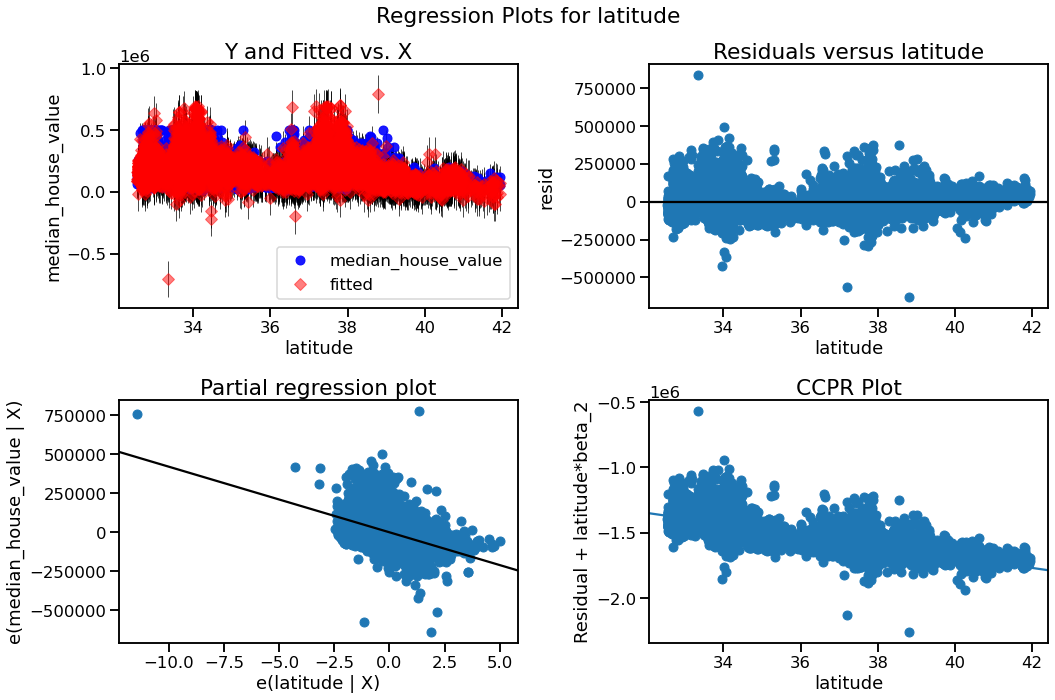

In [126]:
# Put your code here
fig = plt.figure(figsize=(15, 10))
sm.graphics.plot_regress_exog(result, 'latitude', fig=fig)
plt.show()

<font size=+3>&#9998;</font> Put your answers here:

The overall trend I am seeing is that as latitude increases the median price of houses seem to decrease

&#9989;  **Question 2.8 (1 points)**: **Answer This:** Explain why the best fit values don’t follow a straight line. Is this a linear model (I.e., with depdence on `latitude`, but no dependence on `latitude`^2, `latitude`^3, etc.)? Be as detailed as possible. 

<font size=+3>&#9998;</font> Put your answers here:

OLS creates a linear model but the fitted values do not have to follow the regression line. THis is a stupid question

&#9989;  **Question 2.9 (6 points)**: In the output of the OLS summary, you should have seen a note that says something like 

"The condition number is large, [[number]]. This might indicate that there are strong multicollinearity or other numerical problems." 

Multicollinearity is a statistical phenomenon where some of the features in a model can be linearly predicted using some of the other features in the model. In other words, the features in the model are somewhat redundant. Hence, even if each feature may be deemed significant, it may still be possible to form a "reduced" model using a smaller number of features. 

**Do This:** Design a second linear model that uses a subset of the eight features to predict the "median_house_value", and fits the data comparably well as the first linear model you designed in Question 3.4. You can choose this subset either by trial and error, or by any other method you'd like.

In [158]:
# Put your code here
sub = sm.add_constant(housing_1)
sub = sub.drop(columns=['population', 'avg_bedrooms', 'avg_rooms', 'housing_median_age', 'households'])

sub2 = sub.drop('median_house_value', axis=1)
sub_model = sm.OLS(sub['median_house_value'], sub2)
sub_result = sub_model.fit()

print(sub_result.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     9568.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        17:39:49   Log-Likelihood:            -2.5820e+05
No. Observations:               20433   AIC:                         5.164e+05
Df Residuals:                   20429   BIC:                         5.164e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.161e+06   6.25e+04    -66.626

&#9989;  **Question 2.10 (4 points)**: **Answer This:** How did your reduced linear model fit the data compared to the full linear model you created in Question 3.4? Give some quantitative justification for this answer.

<font size=+3>&#9998;</font> Put your answers here:

The reduced linear model is not as good of a fit as our full linear model. Our R-Squared value decreased to 0.584 meaning our new model is not as accurate and does not fit the actual values. 

&#9989;  **Question 2.11 (2 points)**: **Answer This:** Now that you have your reduced model, make a heat map showing the correlations between the different variables (similar to what we did on Day 14).

<AxesSubplot:>

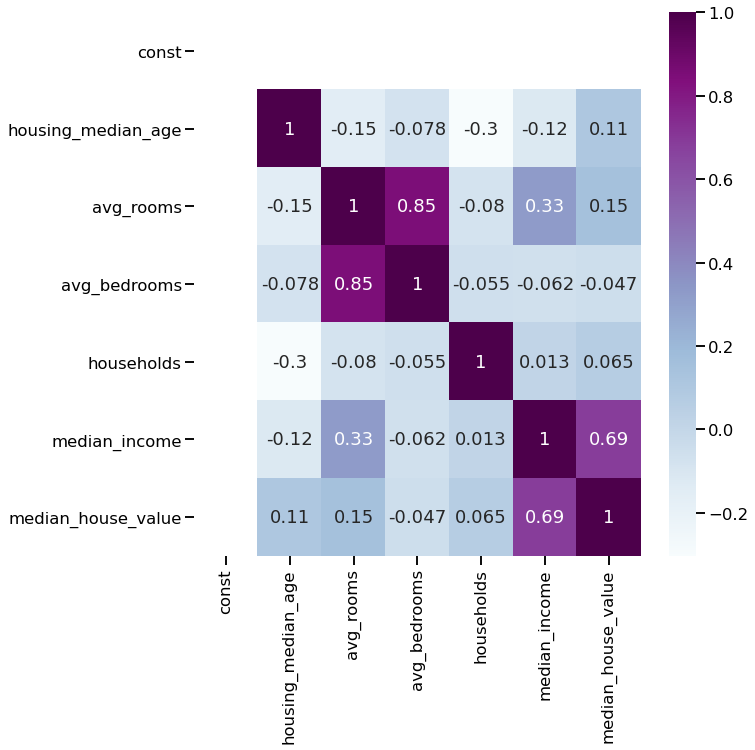

In [128]:
# Put your code here
import seaborn as sns 

fig, ax = plt.subplots(1,1,figsize=(10,10))
corre = sub.corr()
sns.heatmap(corre, cmap='BuPu', annot=True)

&#9989;  **Question 2.12 (4 points)**: **Answer This:** You should find that there isn’t much overlap between the high-correlation variables in the heat map and the variables you used in your (reduced)  model, the opposite of what we found on Day 14. Explain why this is the case.

<font size=+3>&#9998;</font> Put your answers here: This is a stupid question

In the context of this data set, you have to think about where the most expensive houses will be located in California. The expensive houses will be in highly sought after real estate, such as certain neighborhoods and locations (ocean, Beaverly Hills, SF, etc). 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete" 

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3. Logistic Regression (25 points)

In this part of the homework, you will work with data from an unknown source. Our goal is to use logistic regression to identify who is more likely to buy merchandise from ads on social networks.

&#9989;  **Question 3.1 (4 points)**: 

1. **Do This:** Download the dataset and write the command you used in the next cell

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv`
    
2. **Do This:** Load the data in this file into a `Pandas` dataframe
3. **Do This:** Display the first **five** rows of the dataframe. 

In [129]:
# Put the command to download the data here 
!curl -O https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/HW/Homework_4/ads.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10926  100 10926    0     0  96690      0 --:--:-- --:--:-- --:--:-- 96690


In [130]:
# Put your code for reading in the dataset here
ads_df = pd.read_csv('ads.csv')
ads_df = ads_df.dropna()
ads_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


As you can see the dataset has only few columns. The first columns is not useful since it is a unique identifier. The second column could be useful, however, we need numbers instead of strings. Hence we are left only with the last three columns. `Age` and `EstimatedSalary` will be our features while `Purchased` will be our labels 

&#9989;  **Question 3.2 (3 points)**: 

1. **Do This:** Drop the first and second columns of the dataset    
2. **Do This:** Divided the rest of the dataset into a train and a test dataset using `train_test_split` function of `scikit-learn`. The test dataset should be 25% of the original data


In [131]:
# Put your code here
ads_1 = ads_df.drop(columns=['User ID', 'Gender'])
ads_1.head() 

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [135]:
from sklearn.model_selection import train_test_split


y = ads_1['Purchased']
x = ads_1.iloc[:,:-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)



&#9989;  **Question 3.3 (4 points)**: 

1. **Do This:** Use the `Logit` class to perform Logistic regression on your training dataset (don't forget to add the constant).
2. **Do This:** Print the results of your model


In [136]:

logit_model = sm.Logit(y_train, sm.add_constant(x_train))
ads_result = logit_model.fit()
print(ads_result.summary())

Optimization terminated successfully.
         Current function value: 0.371982
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                  0.4355
Time:                        17:01:25   Log-Likelihood:                -111.59
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 4.080e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.0100      1.445     -8.313      0.000     -14.842      -9.178
Age           

&#9989;  **Question 3.4 (2 points)**: Do you think this is a good fit? Explain your answer


     Write your answer here
     
     No, this is not a good fit. Our pseudo R-squared values is below 0.5, indicating that there are many datapoints away from our regression line. 

&#9989;  **Question 3.5 (4 points)**: Use the above model to make predictions on the test dataset. Remember that the `Logit` model returns continuous values from 0 to 1 while you need two discrete values. Then use the function `accuracy_score` from `scikit-learn` to see how good your model is.

In [134]:
# Put your code here
from sklearn.metrics import accuracy_score 

ads_predict = ads_result.predict(sm.add_constant(x_test))
ads_predict

discrete_product = []

for i in ads_predict:
    if i<0.5:
        discrete_product.append(0)
    if i >= 0.5:
        discrete_product.append(1)
        
test_model = accuracy_score(y_test, discrete_product)
print(test_model)

0.89


&#9989;  **Question 3.6 (1 point)**: Does the accuracy score change your opinion of the goodness of your model?


    write your answer here
    Yes, this would indicate that our model is accurate but there may be a couple of data points that are very far away from our regression line and is skewing our data.

&#9989;  **Question 3.7 (5 points)**: Does your model improve if you re-introduce the `Gender` column? Since the column is made of strings, replace `Male` with 0 and `Female` with 1. Is `Gender` an informative feature?
Explain your answers

In [155]:
# Put your code here
ads_2 = ads_df.drop(columns=['User ID'])
ads_2 = ads_2.replace('Male', 0)
ads_2 = ads_2.replace('Female', 1)

y2 = ads_2['Purchased']
x2 = ads_2.iloc[:,:-1]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25, random_state=0)


logit_model2 = sm.Logit(y2_train, sm.add_constant(x2_train))
ads2_result = logit_model2.fit()
print(ads2_result.summary())

Optimization terminated successfully.
         Current function value: 0.371191
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                  0.4367
Time:                        17:34:30   Log-Likelihood:                -111.36
converged:                       True   LL-Null:                       -197.69
Covariance Type:            nonrobust   LLR p-value:                 3.393e-37
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -12.0315      1.452     -8.285      0.000     -14.878      -9.185
Gender        

Gender is not informative. It is either one value or not, it does not have a profound effecct on whether or not a person makes more or less. The Pseuod R-Squared value is nearly identical. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete" 

---

## Part 4. Finishing up (3 points)


It is now time to merge your changes to the main branch and push

&#9989; **Question 4.1 (1 point):** Switch to your main branch

```bash
# Put the command(s) to switch to your main branch
```
git switch main


&#9989; **Question 4.2 (1 point):** Merge your `hw04-branch`

```bash
# Put the command(s) to merge your branch
```
git merge hw04_branch main


&#9989; **Question 4.3 (1 point):** Finally push the changes to GitHub

```bash
# Put the command(s) to push your new main branch
```
git push

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [114]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/TMrrP0WnVM" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University